# LINEAR SVM

In [153]:
! pip install graphviz
! pip install dl8.5
! pip install chefboost
! pip install sklearn
! pip install libsvm

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import libsvm
from libsvm.svmutil import *
from pprint import pprint

%matplotlib inline

## 3.1 Linear Support Vector Machine on toy data

### 3.1.1 
Generate a training set of size $100$ with 2D features (X) drawn at random as follows:
* X_{neg} $\sim$ $\mathcal{N}$([-5, -5], 5*$I_2$) and correspond to negative labels (-1)
* X_{pos} $\sim$ $\mathcal{N}$([5, 5], 5*$I_2$) and correspond to positive labels (+1)
<br />
Accordingly, $X = [X_{neg}, X_{pos}]$ is a $100\times2$ array, Y is a $100\times1$ array of values $\in \{-1, 1\}$.
<p/>Draw a scatter plot of the full training dataset with the points colored according to their labels.

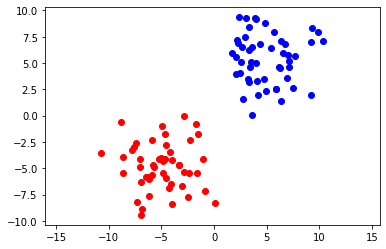

In [230]:
debug_mode = False
# Generate binary class dataset
np.random.seed(0)

n_samples = 100
center_1 = [-5, -5]
center_2 = [5, 5]

# Generate Data:
Xneg = np.random.multivariate_normal([-5, -5], [[5, 0], [0, 5]], 50).T
Xpos = np.random.multivariate_normal([5, 5], [[5, 0], [0, 5]], 50).T
X = np.swapaxes(np.append(Xneg, Xpos,axis=1),0,1)
Y = np.array([-1]*50+[1]*50)

if debug_mode:
  print("\t\tX \t\t    | Y")
  pprint(list(zip(X,Y)))

# Scatter plot:
plt.scatter([i[0] for i in X[:50]],[i[1] for i in X[:50]], color='red')
plt.scatter([i[0] for i in X[50:]],[i[1] for i in X[50:]], color='blue')
plt.axis('equal')
plt.show()


### 3.1.2 
Train a linear support vector machine on the data with $C=1$ and draw the decision boundary line that separates o and x. Mark the support vectors separately (ex.circle around the point). 

Note: You can use the libsvm.svmutil functions with the kernel_type set to 0, indiciating a linear kernel and svm_type set to 0 indicating C-SVC.
Also note that the support_vector coefficients returned by the LIBSVM model are the dual coefficients.

In [231]:
def print_model(m):
  svm_type = m.get_svm_type()
  nr_class = m.get_nr_class()
  svr_probability = m.get_svr_probability()
  class_labels = m.get_labels()
  sv_indices = m.get_sv_indices()
  nr_sv = m.get_nr_sv()
  is_prob_model = m.is_probability_model()
  sv_coefficients = m.get_sv_coef()
  svs = m.get_SV()

  print("svm_type:", svm_type)
  print("nr_class:", nr_class)
  print("svr_probability:", svr_probability)
  print("labels:", class_labels)
  print("sv_indices:", sv_indices)
  print("nr_sv:", nr_sv)
  print("probability_model:",is_prob_model)
  print("SVs (10):")
  pprint(svs[:10])
  print("SV coefficients, SVs (10):")
  pprint(list(zip(sv_coefficients[:10],svs[:10])))



sv: 7.656515374994706 5.708705225230299
sv: 6.398060026167622 1.417690178189365
sv: -2.36416874839897 -5.402324163716905


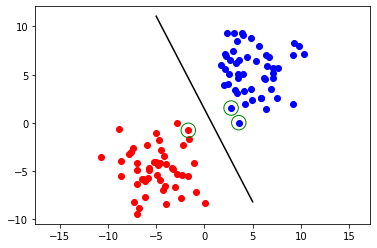

In [232]:
# Define the SVM problem
p = svm_problem(Y, X)

# Define the hyperparameters
h = svm_parameter('-s 0 -t 0 -c 1')

# Train the model
m = svm_train(p,h)

# Print Information about Model
if(debug_mode):
    print_model(m)

# Compute the slope and intercept of the separating line/hyperplanee with the use of the support vectors
# and other information from the LIBSVM model.

w = np.matmul(X[np.array(m.get_sv_indices()) - 1].T, m.get_sv_coef())
b = -m.rho.contents.value

slope = -w[0]/w[1] 
intercept = -b/w[1]

lx = np.linspace(-5,5)
ly = slope*lx + intercept

if(debug_mode):
  print("w:", w)
  print("b:", b)
  print("slope:", slope)
  print("intercept:", intercept)

# Draw the scatter plot, the decision boundary line, and mark the support vectors.

figure, axes = plt.subplots()
plt.scatter([i[0] for i in X[:50]],[i[1] for i in X[:50]], color='red')
plt.scatter([i[0] for i in X[50:]],[i[1] for i in X[50:]], color='blue')
plt.axis('equal')

plt.plot(lx,ly,'k-')
plt.axis('equal')

#indicate support vectors
for sv_idx in sv_indices:
  print("sv:", X[sv_idx][0], X[sv_idx][1])
  circle = plt.Circle((X[sv_idx -1, 0], X[sv_idx -1, 1]), 0.75, color='green', fill=False)
  axes.set_aspect(1)
  axes.add_artist(circle)
plt.show()

### 3.1.3 
Draw a line that separates the data for 8 different $C$ ($10^{-5}$~$10^7$).
Plot the number of support vectors vs. $C$ (plot x-axis on a log scale).
How does the number of support vectors change as $C$ increases and why does it change like that? 

Note: You might prefer to use the command-line style of svm_parameter initialization such as: svm_parameter('-s 0 -t 0') to indicate a linear kernel and C-SVC as the SVM type.


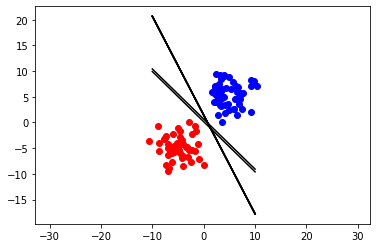

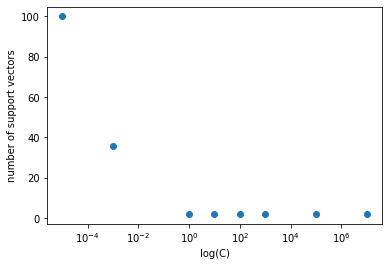

In [158]:

C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
num_sv = []

# Initialize Plot with data points
figure, axes = plt.subplots()
# Scatter plot:
plt.scatter([i[0] for i in X[:50]],[i[1] for i in X[:50]], color='red')
plt.scatter([i[0] for i in X[50:]],[i[1] for i in X[50:]], color='blue')
plt.axis('equal')



# Loop over a similar setup to that in the previous code block.
for C in C_range:
  # Define the hyperparameters
  h = svm_parameter(f'-s 0 -t 0 -c {C} ')

  # Train the model
  m = svm_train(p,h)

  # Get Information about Model
  svs = m.get_SV()
  w = np.matmul(X[np.array(m.get_sv_indices()) - 1].T, m.get_sv_coef())
  b = -m.rho.contents.value

  slope = -w[0]/w[1] 
  intercept = -b/w[1]

  lx = np.linspace(-10,10)
  ly = slope*lx + intercept

  # Draw the scatter plot with multiple decision lines on top (one for each value of C)
  plt.plot(lx,ly,'k-')
  plt.axis('equal')

  #indicate support vectors
  num_sv.append(len(svs))

plt.show()

# Draw the num_sv vs. C plot.

figure, axes = plt.subplots()
axes.set_xscale('log')
plt.scatter(C_range,num_sv)
plt.xlabel("log(C)")
plt.ylabel("number of support vectors")
plt.show()



### 3.1.4 
Now try rescaling the data to the [0,1] range and repeat the steps of the previous question (3.1.3) and over the same range of $C$ values. Are the decision boundaries different from those in the previous question? What does this imply about (a) the geometric margin and (b) the relative effect of each feature on the predictions of the trained model ?

#### Solution below: 
SVM tries to maximize the distance between the separating plane and the support vectors. 
If one feature (i.e. one dimension in this space) has very large values, 
it will dominate the other features when calculating the distance. If you rescale all 
features (e.g. to [0, 1]), they all have the same influence on the distance metric.



In [233]:
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# Single line below:
min_max_scaler.fit(X)
X_train_minmax = min_max_scaler.transform(X)

C:1e-05 | len(svs):100
C:0.001 | len(svs):100
C:1 | len(svs):20
C:10 | len(svs):6
C:100 | len(svs):3
C:1000 | len(svs):3
C:100000 | len(svs):3
C:10000000 | len(svs):3


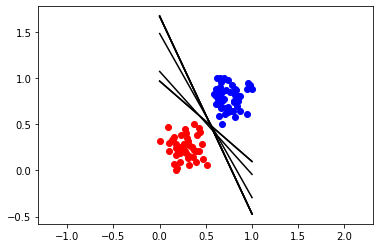

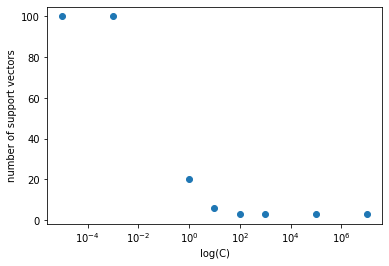

In [234]:

C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
num_sv = []

# Initialize Plot with data points
figure, axes = plt.subplots()
plt.scatter([i[0] for i in X_train_minmax[:50]],[i[1] for i in X_train_minmax[:50]], color='red')
plt.scatter([i[0] for i in X_train_minmax[50:]],[i[1] for i in X_train_minmax[50:]], color='blue')

# Define the SVM problem
p = svm_problem(Y, X_train_minmax)

# Repeat the loop from 3.1.3
# Loop over a similar setup to that in the previous code block.
for C in C_range:
  # Define the hyperparameters
  h = svm_parameter(f'-s 0 -t 0 -c {C} ')

  # Train the model
  m = svm_train(p,h)

  # Get Information about Model
  svs = m.get_SV()
  print(f"C:{C} | len(svs):{len(svs)}")
  w = np.matmul(X_train_minmax[np.array(m.get_sv_indices()) - 1].T, m.get_sv_coef())
  b = -m.rho.contents.value

  slope = -w[0]/w[1] 
  intercept = -b/w[1]
  lx = np.linspace(-0,1)
  ly = slope*lx + intercept

  # Draw the scatter plot with multiple decision lines on top (one for each value of C)
  plt.plot(lx,ly,'k-')
  plt.axis('equal')

  #indicate support vectors
  num_sv.append(len(svs))

plt.show()

# Draw the num_sv vs. C plot.

figure, axes = plt.subplots()
axes.set_xscale('log')
plt.scatter(C_range,num_sv)
plt.xlabel("log(C)")
plt.ylabel("number of support vectors")
plt.show()


The decision boundaries are different than those in the previous question, as there is more variation in the slope of these decision boundaries, with steeper slopes occuring in the scaled version. This implies that the geometric margin is biased by outliers in the data, and the functional margin gives a more accurate picture of the relationship. This means that the scaled version gives more equitable impact to all features on the prediction.

## *Penguins*



```
# This is formatted as code
```

Multiclass SVM. In this problem, we will use support vector machines to classify penguins species based on the given features.

### 
Load in the penguins data using from the provided penguins.csv file on Sakai. Preprocess the features. Then we will use the train_test_split from sklearn to split the data into training and testing into a 0.8 : 0.2 ratio.

In [235]:
from sklearn.model_selection import train_test_split
import pandas as pd
# load data
import io
df = pd.read_csv(io.BytesIO(uploaded['penguins.csv']))

if debug_mode: print(df.info())

# split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Species'], axis=1).to_numpy(), df['Species'].to_numpy(), test_size=0.2, random_state=1)


Train the support vector machine classifier with a linear kernel on the first 5000 datapoints and test the accuracy on the following 5000 points.
Plot test accuracy and the number of support vectors (two separate plots) vs. $C$ for $C=10^{-12}$~$10^{12}$ (plot 7 points or more with the x-axis on a log scale). 

C:1e-12 | len(svs):159
Accuracy = 37.4545% (103/275) (classification)
C:1e-07 | len(svs):164
Accuracy = 37.4545% (103/275) (classification)
C:0.001 | len(svs):100
Accuracy = 94.5455% (260/275) (classification)
C:1 | len(svs):14
Accuracy = 97.4545% (268/275) (classification)
C:1000 | len(svs):11
Accuracy = 97.4545% (268/275) (classification)
C:10000000 | len(svs):11
Accuracy = 97.4545% (268/275) (classification)
C:1000000000000 | len(svs):10
Accuracy = 97.4545% (268/275) (classification)
test accuracies:  [37.45454545454546, 37.45454545454546, 94.54545454545455, 97.45454545454545, 97.45454545454545, 97.45454545454545, 97.45454545454545]
num_sv:  [159, 164, 100, 14, 11, 11, 10]
C_range:  [1e-12, 1e-07, 0.001, 1, 1000, 10000000, 1000000000000]


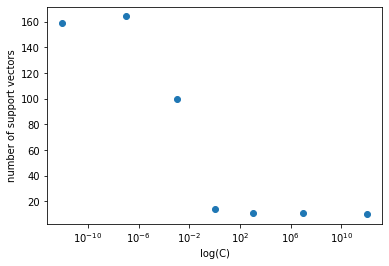

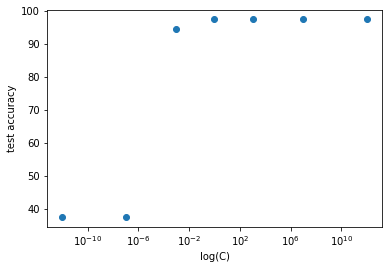

In [198]:
C_range = [10**-12, 10**-7, 10**-3, 1, 10**3, 10**7, 10**12]

num_sv = []
test_accuracy = []

# Define the SVM problem
p = svm_problem(y_train, X_train)

# Repeat the loop from 3.1.3
# Loop over a similar setup to that in the previous code block.
for C in C_range:
  # Define the hyperparameters
  h = svm_parameter(f'-s 0 -t 0 -c {C} ')

  # Train the model
  m = svm_train(p,h)

  # Get Information about Model
  svs = m.get_SV()
  print(f"C:{C} | len(svs):{len(svs)}")

  # Run test
  p_labels, p_acc, p_vals = svm_predict(y_train, X_train, m)

  # record support vectors & test_accuracy
  num_sv.append(len(svs))
  test_accuracy.append(p_acc[0])


# Draw plots.
if debug_mode:
  print("test accuracies: ", test_accuracy)
  print("num_sv: ", num_sv)
  print("C_range: ", C_range)

figure, axes = plt.subplots()
axes.set_xscale('log')
plt.scatter(C_range,num_sv)
plt.xlabel("log(C)")
plt.ylabel("number of support vectors")
plt.show()

figure, axes = plt.subplots()
axes.set_xscale('log')
plt.scatter(C_range,test_accuracy)
plt.xlabel("log(C)")
plt.ylabel("test accuracy")
plt.show()


Calculate variable importance (CulmenLength, CulmenDepth, FlipperLength, BodyMass) with your classifier. Rank these variables/ features from most important to the least important. Utilize three strategies covered in the class:
* model reliance
* conditional model reliance
* algorithm reliance

Do all three give the same result?


In [211]:
# Model Reliance

# shuffle feature values
X = df.drop(['Species'], axis=1).copy()
Y = df['Species'].copy()

MRdiff = []
MRratio = []
baseline_loss = 1 - test_accuracy[3]/100 # C=1 accuracy without variable scrambling
print("baseline_loss:",baseline_loss)

for col in X.columns:
  X_mod = X.copy()
  X_mod[col] = np.random.permutation(X[col])

  X_train, X_test, y_train, y_test = train_test_split(
      X_mod.to_numpy(),
       Y.to_numpy(),
        test_size=0.2,
         random_state=1
         )
  
  # Define the SVM problem
  p = svm_problem(y_train, X_train)

  # Define the hyperparameters
  h = svm_parameter('-s 0 -t 0 -c 1 ')

  # Train the model
  m = svm_train(p,h)

  # Get Information about Model
  svs = m.get_SV()

  # Run test
  p_labels, p_acc, p_vals = svm_predict(y_train, X_train, m)

  # using p_acc as loss
  loss = 1 - p_acc[0]/100
  MRdiff.append(loss - baseline_loss)
  MRratio.append(loss / baseline_loss)
print("\nModel Reliance Diffs and Ratios:")
pprint(list(zip(X.columns,MRdiff,MRratio)))


baseline_loss: 0.025454545454545507
Accuracy = 19.2727% (53/275) (classification)
Accuracy = 65.0909% (179/275) (classification)
Accuracy = 87.2727% (240/275) (classification)
Accuracy = 19.2727% (53/275) (classification)

Model Reliance Diffs and Ratios:
[('CulmenLength', 0.7818181818181817, 31.714285714285648),
 ('CulmenDepth', 0.3236363636363636, 13.714285714285687),
 ('FlipperLength', 0.10181818181818181, 4.999999999999991),
 ('BodyMass', 0.7818181818181817, 31.714285714285648)]


In [228]:
# Contitional Model Reliance 


from sklearn.kernel_ridge import KernelRidge # using sklearns KernelRidge

# get baseline
baseline = []
new_df = df.drop(['Species'], axis=1).dropna().copy()
for col in new_df.columns:
  X = new_df.drop([col], axis=1).copy()
  Y = new_df[col].copy()

  X_train, X_test, y_train, y_test = train_test_split(
        X.to_numpy(),
        Y.to_numpy(),
          test_size=0.2,
          random_state=1
          )

  # get baseline
  clf = KernelRidge(alpha=1.0)
  clf.fit(X_train, y_train)
  baseline.append(clf.score(X_test,y_test))

CMRratio = []
# scramble each column and get score
for i, col in enumerate(new_df.columns):
  X = new_df.drop([col], axis=1).copy()
  Y = new_df[col].copy()
  Y_mod = Y.copy()
  Y_mod = np.random.permutation(Y_mod)

  X_train, X_test, y_train, y_test = train_test_split(
        X.to_numpy(),
        Y_mod,
          test_size=0.2,
          random_state=1
          )

  # create model and get score
  clf = KernelRidge(alpha=1.0)
  clf.fit(X_train, y_train)
  CMRratio.append(clf.score(X_test,y_test)/baseline[i])


print("\nConditional Model Reliance Ratios:")
pprint(list(zip(new_df.columns,CMRratio)))





Conditional Model Reliance Ratios:
[('CulmenLength', -0.49916993598076004),
 ('CulmenDepth', 0.3612962511913667),
 ('FlipperLength', 30.191864150680807),
 ('BodyMass', -0.1621143017752591)]


In [229]:
# Algorithm Reliance

# drop each variable one by one and see how it affects algorithm accuracy

X = df.drop(['Species'], axis=1).copy()
Y = df['Species'].copy()

ARdiff = []
ARratio = []
baseline_loss = 1 - test_accuracy[3]/100 # C=1 accuracy without variable scrambling
print("baseline_loss:",baseline_loss)

for col in X.columns:
  X_mod = X.drop([col], axis=1).copy()

  X_train, X_test, y_train, y_test = train_test_split(
      X_mod.to_numpy(),
       Y.to_numpy(),
        test_size=0.2,
         random_state=1
         )
  
  # Define the SVM problem
  p = svm_problem(y_train, X_train)

  # Define the hyperparameters
  h = svm_parameter('-s 0 -t 0 -c 1 ')

  # Train the model
  m = svm_train(p,h)

  # Get Information about Model
  svs = m.get_SV()

  # Run test
  p_labels, p_acc, p_vals = svm_predict(y_train, X_train, m)

  # using p_acc as loss
  loss = 1 - p_acc[0]/100
  ARdiff.append(loss - baseline_loss)
  ARratio.append(loss / baseline_loss)
print("\nAlgorithm Reliance Diffs and Ratios:")
pprint(list(zip(X.columns,ARdiff,ARratio)))


baseline_loss: 0.025454545454545507
Accuracy = 82.9091% (228/275) (classification)
Accuracy = 68.3636% (188/275) (classification)
Accuracy = 79.2727% (218/275) (classification)
Accuracy = 98.5455% (271/275) (classification)

Algorithm Reliance Diffs and Ratios:
[('CulmenLength', 0.1454545454545454, 6.7142857142857),
 ('CulmenDepth', 0.2909090909090909, 12.428571428571404),
 ('FlipperLength', 0.18181818181818188, 8.14285714285713),
 ('BodyMass', -0.01090909090909098, 0.5714285714285695)]


No, all 3 metrics do not give the same result. For Model Reliance, we see that the errors for 'CulmenLength' and 'BodyMass' went up signifigantly when those variables were scrambled, indicating that they are important for the model. For Conditional Model Reliance, we see that 'FlipperLength' provides the most unique information that can't be found from other features. And, in Algorithm Reliance, we see that 'CulmenDepth' is the feature that the Algorithm depends on most to perform well. So each of these measures gives us a different insight into how important certain variables are for the model, and algorithm.